## Analysis of the Health of The Saguaro Population at Desert Botanical Garden

<img src="images/Saguaro.jpg">  <img src="images/Saguaro map.png">

---

## Introduction
* Desert Botanical Garden (DBG) has conducted an annual Saguaro Inventory since 2012. Now that 8 years of data have been collected, DBG is curious to find out if there are any patterns or trends in the data, particularly with respect to weather. We focused this analysis on two main questions. 1. Is there a relationship between saguaro mortality and number of nights above 90 degrees. Cactus cannot "breathe" when the night-time temperature stays above 90, so we would expect to see a trend. 2. Is there a relationship between saguaro growth rate and precipitation. We would expect to see years with higher precipitation produce higher growth rates in the following year.

## Import data
* Historical Saguaro Inventory records were requested from DBG. A report was downloaded from livingcollections.org.
* Weather data was purchased from Visual Crossing: https://www.visualcrossing.com/weather/weather-data-services#/login
* Mortality_per_year_ready_for_analysis.csv contains the count of how many saguaros were lost in each year of interest.
* GrowthRates_ready_for_analysis.csv contains average annual growth rates for each timespan of interest.
* Nights_above_90_ready_for_analysis.csv contains the count of how many days had a low >= 90 F for each year.
* precip_ready_for_analysis.csv contains average precipitation for each timespan of interest.

## Analyze saguaro mortality patterns
* Bar plot of saguaro losses each year
* Bar plot of nights above 90 earch year
* Line plot of saguaro losses versus nights above 90

## Analyze saguaro growth rate patterns
* Bar plot of saguaro growth rate per timespan
* Bar plot of average annual precipitation per timespan
* Line plot of saguaro growth rate versus average annual precipitation

## Conclusions and Future Work
* The scatterplots backed up the trend we were expecting to find between saguaro mortality and nights above 90. However, the scatterplot of growth rate versus precipitation revealed the exact opposite trend. Given that the growth rate versus precipitation trend is only based on 2 data points, it might not be very reliable.

* Due to the difficulty of measuring saguaro heights, they can only be measured every 5 years. Therefore we only had access to two growth rate datapoints. As time passes and more data is collected, it will be interesting to run regression analyses on growth rate-related trends.

* Future work will include Saguaro Inventory 2021 in February!

In [133]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# Import data
mortality_per_year_df = pd.read_csv("../Data ready for analyses/Mortality_per_year_ready_for_analysis.csv")
growth_rates_df = pd.read_csv("../Data ready for analyses/GrowthRates_ready_for_analysis.csv")
nights_above_90_df = pd.read_csv("../Data ready for analyses/Nights_above_90_ready_for_analysis.csv")
precip_df = pd.read_csv("../Data ready for analyses/precip_ready_for_analysis.csv")

# Analyze Saguaro Mortality Trends

In [135]:
# View dataset
mortality_per_year_df

,Unnamed: 0,Year,Mortality Count
0,0,2013,7
1,1,2014,5
2,2,2015,21
3,3,2016,8
4,4,2017,19
5,5,2018,13
6,6,2019,18
7,7,2020,15


In [136]:
# Drop first column
mortality_per_year_df = mortality_per_year_df[["Year", "Mortality Count"]]
mortality_per_year_sorted_df = mortality_per_year_df.sort_values("Mortality Count")

mortality_per_year_sorted_df

,Year,Mortality Count
1,2014,5
0,2013,7
3,2016,8
5,2018,13
7,2020,15
6,2019,18
4,2017,19
2,2015,21


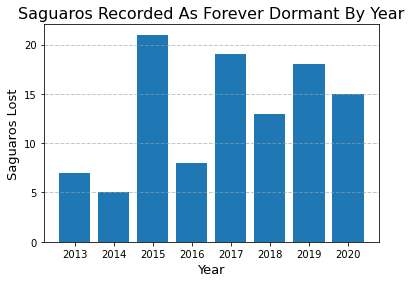

In [137]:
# Bar plot of saguaros recorded as "Forever Dormant" each year.
plt.bar(mortality_per_year_df["Year"], mortality_per_year_df["Mortality Count"])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Saguaros Recorded As Forever Dormant By Year", fontsize = 16)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Saguaros Lost", fontsize = 13)
plt.yticks(np.arange(0, 25, step=5))
plt.show()

In [138]:
# Drop first column
nights_above_90_df = nights_above_90_df[["Year", "Nights Above 90"]]
nights_above_90_sorted_df = nights_above_90_df.sort_values("Nights Above 90")
nights_above_90_sorted_df

,Year,Nights Above 90
2,2014,4
4,2016,6
3,2015,7
5,2017,7
0,2012,8
7,2019,10
6,2018,11
1,2013,13


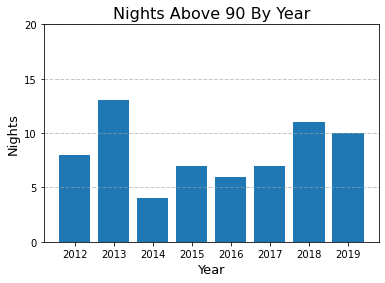

In [139]:
# Bar plot of nights above 90 each year.
plt.bar(nights_above_90_df["Year"], nights_above_90_df["Nights Above 90"])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Nights Above 90 By Year", fontsize = 16)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Nights", fontsize = 13)
plt.yticks(np.arange(0, 25, step=5))
plt.show()

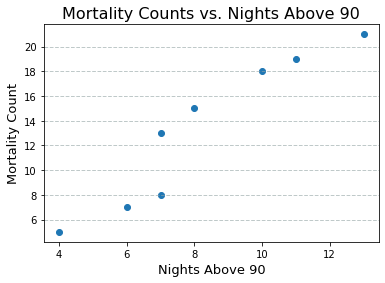

In [154]:
# Scatterplot of saguaros lost versus nights above 90
x_axis = nights_above_90_sorted_df["Nights Above 90"]
y_axis = mortality_per_year_sorted_df["Mortality Count"]
plt.scatter(x_axis, y_axis)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Mortality Counts vs. Nights Above 90", fontsize = 16)
plt.xlabel("Nights Above 90", fontsize = 13)
plt.ylabel("Mortality Count", fontsize = 13)
plt.show()

In [141]:
# Calculate mean mortality
mean_mortality = mortality_per_year_df["Mortality Count"].mean()

mean_mortality

13.25

# Analyze Saguaro Growth Rate Trends

In [142]:
# Drop first column
precip_df = precip_df[["Timespan", "Mean Precipitation"]]
precip_df

,Timespan,Mean Precipitation
0,1,8.360
1,2,6.566


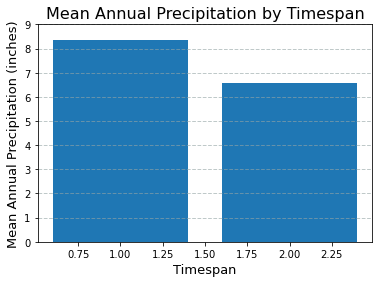

In [143]:
# Bar plot of average annual precipitation in each timespan.
plt.bar(precip_df["Timespan"], precip_df["Mean Precipitation"])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Mean Annual Precipitation by Timespan", fontsize = 16)
plt.xlabel("Timespan", fontsize = 13)
plt.ylabel("Mean Annual Precipitation (inches)", fontsize = 13)
plt.yticks(np.arange(0, 10, step=1))
plt.show()

In [144]:
# Drop first column
growth_rates_df = growth_rates_df[["Timespan", "Average Yearly Growth Rate"]]
growth_rates_df

,Timespan,Average Yearly Growth Rate
0,2013 - 2015,0.322
1,2015 - 2020,0.734


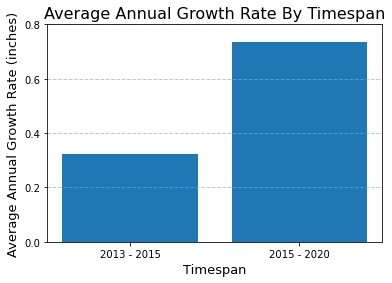

In [145]:
# Bar plot of average growth rate in each timespan.
plt.bar(growth_rates_df["Timespan"], growth_rates_df["Average Yearly Growth Rate"])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Average Annual Growth Rate By Timespan", fontsize = 16)
plt.xlabel("Timespan", fontsize = 13)
plt.ylabel("Average Annual Growth Rate (inches)", fontsize = 13)
plt.yticks(np.arange(0, 1, step=0.2))
plt.show()

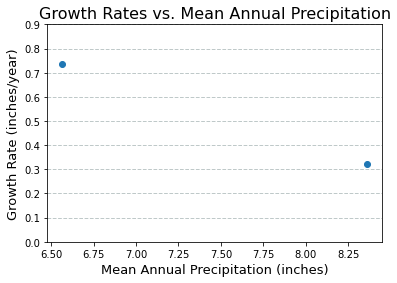

In [155]:
# Scatterplot of growth rate 
x_axis = precip_df["Mean Precipitation"]
y_axis = growth_rates_df["Average Yearly Growth Rate"]
plt.scatter(x_axis, y_axis)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Growth Rates vs. Mean Annual Precipitation", fontsize = 16)
plt.xlabel("Mean Annual Precipitation (inches)", fontsize = 13)
plt.ylabel("Growth Rate (inches/year)", fontsize = 13)
plt.yticks(np.arange(0, 1, step=.1))
plt.show()